# Problem Statement:
Genetic Algorithm (Multi-objective optimization--NSGA) on Iris dataset

# Algorithm:
Step 1: Take Input: N', g, fk(X) ▷ N' members evolved g generations to solve fk(X)

Step 2: Initialize Population P'

Step 3: Generate random population - size N' 

Step 4: Evaluate Objectives Values 

Step 5: Assign Rank (level) based on Pareto – sort

Step 6: Generate Child Population
Binary Tournament Selection 
Recombination and Mutation 

Step 7: s for i=1 to g do

&ensp; for each Parent and Child in Population do 

&emsp; &emsp;Assign Rank (level) based on Pareto - sort  
&emsp; &emsp;Generate sets of nondominated solutions 

&emsp;&emsp;Determine Crowding distance 

&emsp;&emsp;Loop (inside) by adding solutions to next generation starting from the first front until N' individuals 
       
&emsp;end 

&emsp; Select points on the lower front with high crowding distance

&emsp;Create next generation

&emsp;Binary Tournament Selection 

&emsp;Recombination and Mutation


Step 8: End

# Code


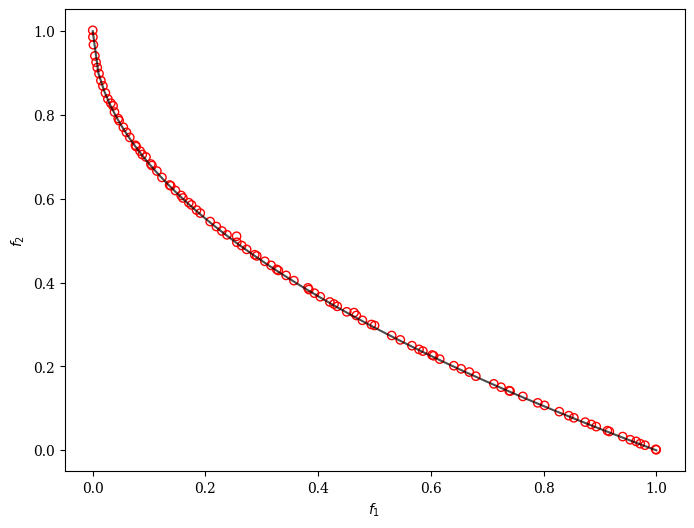

In [4]:

import numpy as np
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt1")

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

Moreover, we can customize NSGA-II to solve a problem with binary decision variables, for example, ZDT5.

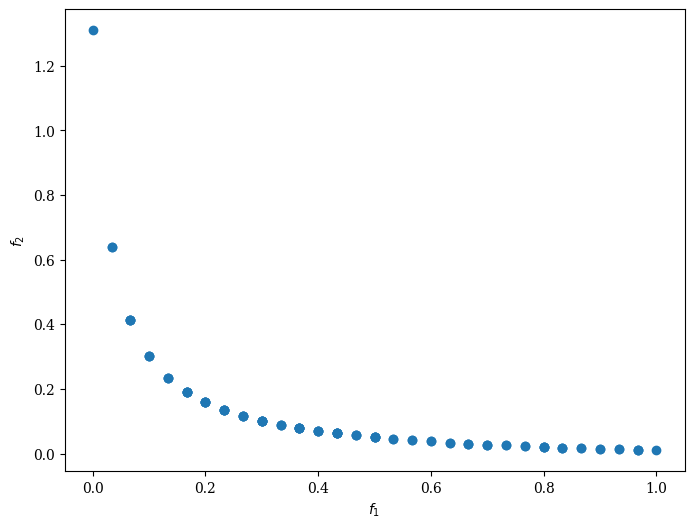

In [5]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.operators.crossover.pntx import TwoPointCrossover
from pymoo.operators.mutation.bitflip import BitflipMutation
from pymoo.operators.sampling.rnd import BinaryRandomSampling
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt5")

algorithm = NSGA2(pop_size=100,
                  sampling=BinaryRandomSampling(),
                  crossover=TwoPointCrossover(),
                  mutation=BitflipMutation(),
                  eliminate_duplicates=True)

res = minimize(problem,
               algorithm,
               ('n_gen', 500),
               seed=1,
               verbose=False)

Scatter().add(res.F).show()

# Remarks: 
The Non-Dominated Sorting Genetic Algorithm II (NSGA-II) is a multi-objective algorithm that 
combines standard genetic algorithm (GA) with non-dominated sorting and a new fitness value. The 
algorithm is used to measure the density of solutions surrounding a particular solution. The complexity of 
a standard implementation of NSGA-II is O(G M N 2), where G is the number of iterations.
